### SVAR

https://pdfs.semanticscholar.org/a652/ccca1372d41c2d99e59141dc962baa82ef5c.pdf

http://mayoral.iae-csic.org/timeseries_insead/svar_gretl.pdf

http://fmwww.bc.edu/EC-C/S2013/823/EC823.S2013.nn10.slides.pdf

http://www.eco.uc3m.es/~jgonzalo/teaching/timeseriesma/zivotvarnotes-reading.pdf

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa as sts
from statsmodels.tsa.api import VAR, SVAR
sns.set_style('whitegrid')
%matplotlib inline
# matplotlib.rcParams['axes.facecolor']='white'
# matplotlib.rcParams['axes.edgecolor']='black'
# matplotlib.rcParams['xtick.color']='black'
# matplotlib.rcParams['ytick.color']='black'
# matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["black", "#e94cdc", "0.7"])
# matplotlib.rcParams['axes.linewidth']=1.3
# matplotlib.rcParams['text.color']='black'
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
dat = pd.read_csv('statsmodels_data_svar.csv')
dat.head()

,year,quarter,gdp,cpi,usd,m
0,2011.0,1,18648.028676,103.808131,29.223177,4930.466667
1,NaN,2,20011.985389,101.144162,27.972200,5023.100000
2,NaN,3,21650.366439,99.710124,29.174600,5280.600000
3,NaN,4,22998.117447,101.345985,31.223240,5438.566667
4,2012.0,1,19662.199920,101.456907,30.152748,5774.100000


In [29]:
dat = dat.iloc[:,2:]
dat

,gdp,cpi,usd,m
0,18648.028676,103.808131,29.223177,4930.466667
1,20011.985389,101.144162,27.972200,5023.100000
2,21650.366439,99.710124,29.174600,5280.600000
3,22998.117447,101.345985,31.223240,5438.566667
4,19662.199920,101.456907,30.152748,5774.100000
5,20899.329521,101.729013,31.077609,5797.400000
6,22357.155929,101.888552,31.951062,5986.733333
7,23435.489267,101.345892,31.078439,5958.633333
8,19909.315335,101.880652,30.421813,6216.633333
9,21251.172958,101.598294,31.656862,6294.566667


Избавимся от сезонности

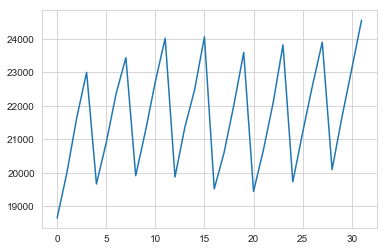

In [30]:
dat['gdp'].plot()

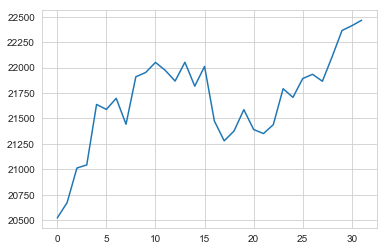

In [12]:
(dat['gdp']/sts.seasonal.seasonal_decompose(dat['gdp'], model='multiplicative', freq=4).seasonal).plot()

In [13]:
dat['gdp'] = dat['gdp']/sts.seasonal.seasonal_decompose(dat['gdp'], model='multiplicative', freq=4).seasonal

Оцениваем ранг коинтеграции

In [84]:
res1=sts.vector_ar.vecm.coint_johansen(dat, det_order=0, k_ar_diff=4)

In [85]:
res1.lr2

array([55.99743907, 36.98264076,  8.10887236,  2.28767164])

In [86]:
res1.cvm

array([[25.1236, 27.5858, 32.7172],
       [18.8928, 21.1314, 25.865 ],
       [12.2971, 14.2639, 18.52  ],
       [ 2.7055,  3.8415,  6.6349]])

In [87]:
res1.eig

array([0.87431534, 0.74582377, 0.25942518, 0.08123838])

####  VAR

In [14]:
model = VAR(dat).fit(4)
print(model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 11, Jun, 2019
Time:                     11:56:47
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    25.9120
Nobs:                     28.0000    HQIC:                   23.6657
Log likelihood:          -408.394    FPE:                1.53526e+10
AIC:                      22.6766    Det(Omega_mle):     2.30125e+09
--------------------------------------------------------------------
Results for equation gdp
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const      23913.544298     11604.210883            2.061           0.039
L1.gdp         0.039151         0.243900            0.161           0.872
L1.cpi        -7.562646        47.585887           -0.159           0.874
L1.usd       -33

Строим графики функций импульсного отклика для всех переменных

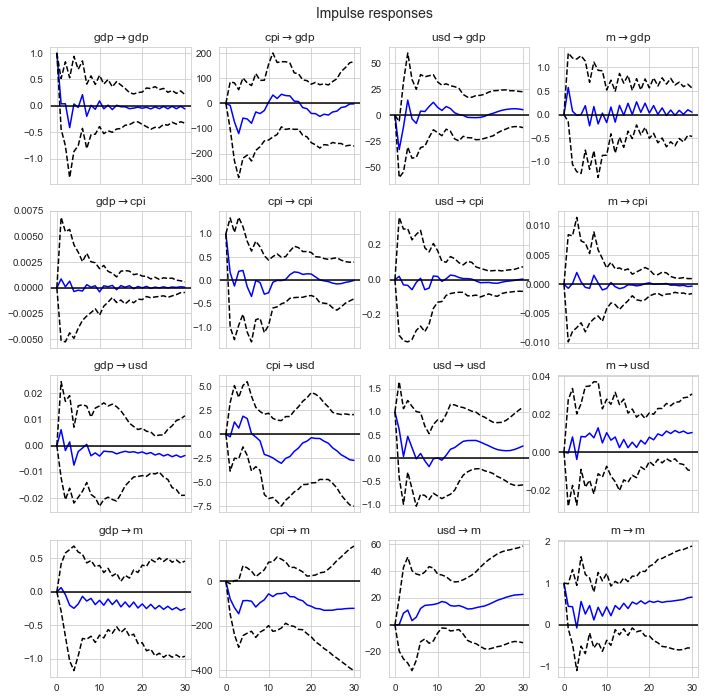

In [15]:
model.irf(30).plot();

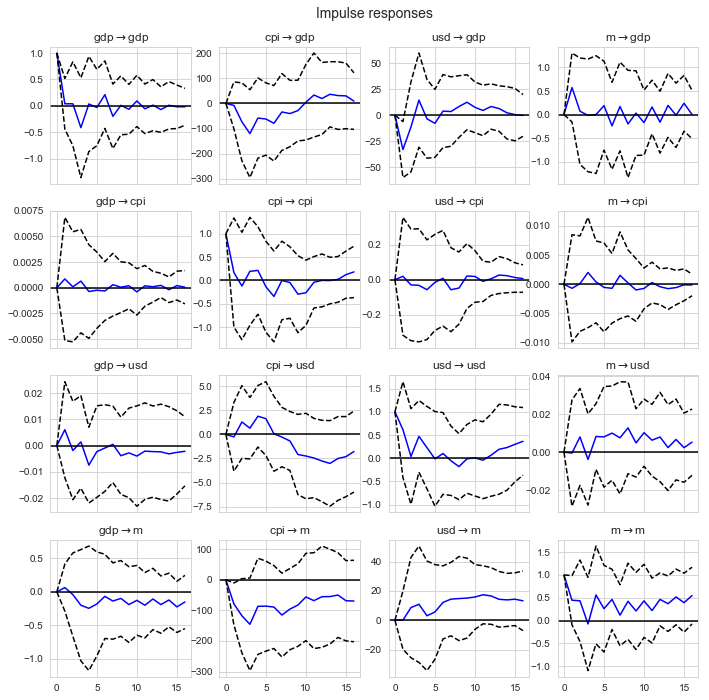

In [16]:
model.irf(16).plot();

#### SVAR

In [19]:
A = np.asarray([[1, 'E', 'E',0],['E', 1, 'E','E'],[0, 'E', 1, 0],[0, 0, 0,1]])
B = np.asarray([['E', 0, 0,0], [0, 'E', 0,0], [0, 0, 'E',0], [0, 0,0, 'E']])

Строим графики импульсного отклика для svar

/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


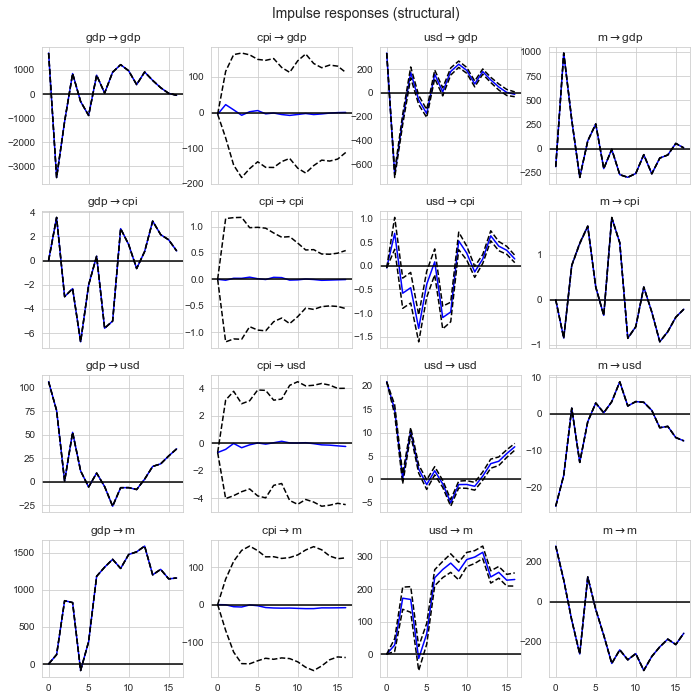

In [20]:
model = SVAR(dat, svar_type='AB', A=A, B=B).fit(maxlags=4)
model.irf(16).plot();

In [21]:
print(model.summary())

  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Tue, 11, Jun, 2019
Time:                     11:57:41
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    25.9120
Nobs:                     28.0000    HQIC:                   23.6657
Log likelihood:          -408.394    FPE:                1.53526e+10
AIC:                      22.6766    Det(Omega_mle):     2.30125e+09
--------------------------------------------------------------------
Results for equation gdp
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const      23913.544298     11604.210883            2.061           0.039
L1.gdp         0.039151         0.243900            0.161           0.872
L1.cpi        -7.562646        47.585887           -0.159           0.874
L1.usd       -33

Оцениваем с 2 лагами

/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


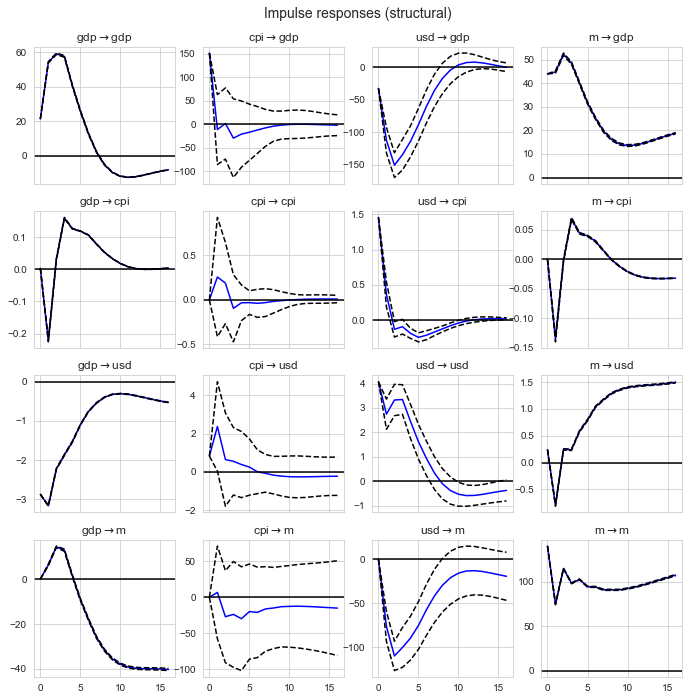

In [22]:
model = SVAR(dat, svar_type='AB', A=A, B=B).fit(maxlags=2)
model.irf(16).plot();

In [23]:
print(model.summary())

  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Tue, 11, Jun, 2019
Time:                     11:58:02
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    25.0732
Nobs:                     30.0000    HQIC:                   23.9296
Log likelihood:          -485.149    FPE:                1.55589e+10
AIC:                      23.3917    Det(Omega_mle):     5.44760e+09
--------------------------------------------------------------------
Results for equation gdp
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const      20849.392107      4753.941052            4.386           0.000
L1.gdp         0.026684         0.201181            0.133           0.894
L1.cpi       -24.185974        37.898969           -0.638           0.523
L1.usd       -18

Оцениваем модель для первых 4 лет

/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


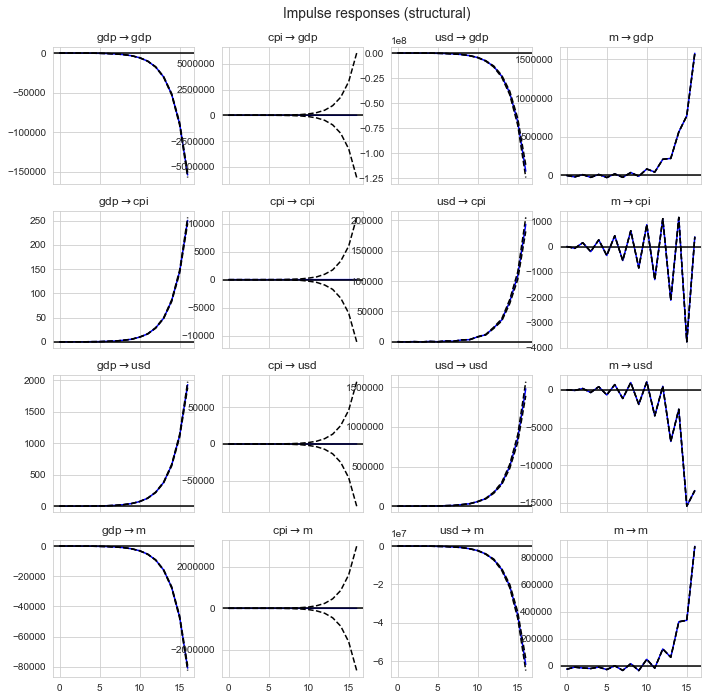

In [24]:
model = SVAR(dat.iloc[:16,:], svar_type='AB', A=A, B=B).fit(maxlags=2)
model.irf(16).plot();

In [25]:
print(model.summary())

  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Tue, 11, Jun, 2019
Time:                     11:58:10
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    19.8403
Nobs:                     14.0000    HQIC:                   18.0449
Log likelihood:          -170.840    FPE:                2.09118e+08
AIC:                      18.1970    Det(Omega_mle):     2.87073e+07
--------------------------------------------------------------------
Results for equation gdp
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const      24991.412459     16663.661458            1.500           0.134
L1.gdp        -0.588518         0.474423           -1.240           0.215
L1.cpi       106.364747       111.340818            0.955           0.339
L1.usd      -132

Оцениваем модель для оставшихся 4 лет

/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


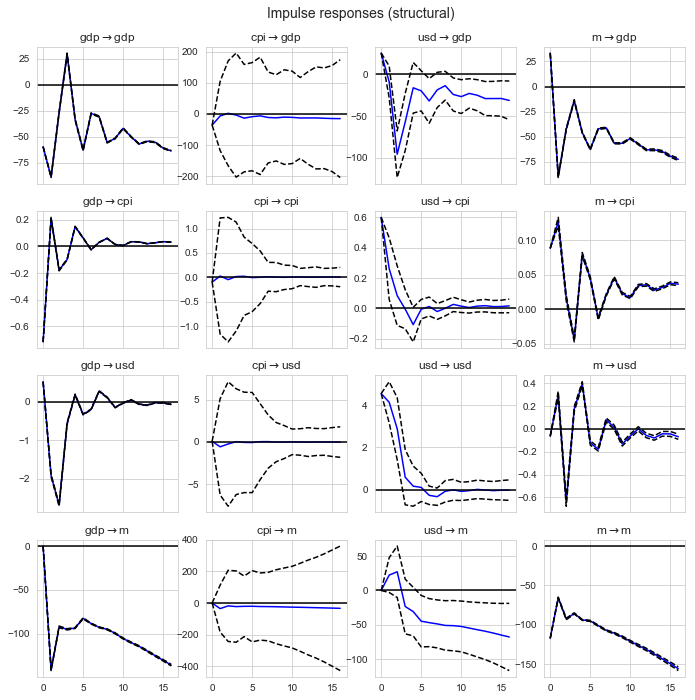

In [26]:
model = SVAR(dat.iloc[16:,:], svar_type='AB', A=A, B=B).fit(maxlags=2)
model.irf(16).plot();

In [27]:
print(model.summary())

  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Tue, 11, Jun, 2019
Time:                     11:58:27
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    21.2765
Nobs:                     14.0000    HQIC:                   19.4811
Log likelihood:          -180.893    FPE:                8.79216e+08
AIC:                      19.6332    Det(Omega_mle):     1.20697e+08
--------------------------------------------------------------------
Results for equation gdp
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const      18260.840498      6552.968841            2.787           0.005
L1.gdp        -0.177423         0.265512           -0.668           0.504
L1.cpi       126.084370        56.650139            2.226           0.026
L1.usd       -17